Classification

Reference: 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_gender.csv')

### Basic Data Exploration and Visualization

In [3]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
df.shape

(66, 5)

In [6]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [7]:
df['Favorite Beverage'].value_counts()

Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

In [8]:
df['Favorite Music Genre'].value_counts()

Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: Favorite Music Genre, dtype: int64

In [9]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [10]:
df.corr()

""


In [11]:
df.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

# KNN Classification Algorithm

In [12]:
from sklearn.model_selection import train_test_split
X= df.drop(['Gender'], axis=1)
y= df['Gender']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import LabelEncoder

In [14]:
cat_atr = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink']

In [15]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
X_train[cat_atr].head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
10,0,4,2,0
59,0,4,4,3
19,0,4,1,0
34,1,2,0,0
63,1,2,1,2


In [17]:
Xtr = X_train[cat_atr]
Xtr.shape 

(46, 4)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [19]:
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

Xtr1 = X_test[cat_atr] 
Xtr1.shape 

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(20, 4)

In [20]:
y_pred = knn.predict(Xtr1)

In [21]:
confusion_matrix(y_test, y_pred)

array([[ 5,  1],
       [10,  4]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.45

In [24]:
from sklearn.metrics import precision_score

In [25]:
precision_score(y_test, y_pred,pos_label='F')

0.3333333333333333

In [26]:
precision_score(y_test, y_pred,pos_label='M')

0.8

In [27]:
from sklearn.metrics import recall_score

In [28]:
recall_score(y_test, y_pred,pos_label='F')

0.8333333333333334

In [29]:
recall_score(y_test, y_pred,pos_label='M')

0.2857142857142857

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(y_test, y_pred,pos_label='F')

0.47619047619047616

In [32]:
f1_score(y_test, y_pred,pos_label='M')

0.4210526315789473

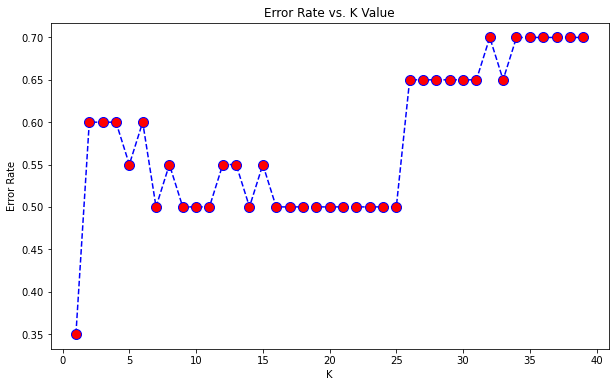

Minimum error:- 0.35 at K = 1


In [33]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [34]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [35]:
y_pred = knn.predict(Xtr1)

In [36]:
accuracy_score(y_test, y_pred)

0.65

Accuracy for knn classifaction is 0.65

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
X= df.drop(['Gender'], axis=1)
y= df['Gender']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
X.shape

(66, 4)

In [40]:
y.shape

(66,)

In [41]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [42]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [43]:
y_pred = dt.predict(Xtr1)

In [44]:
np.sum((y_test == y_pred))/y_test.size

0.45

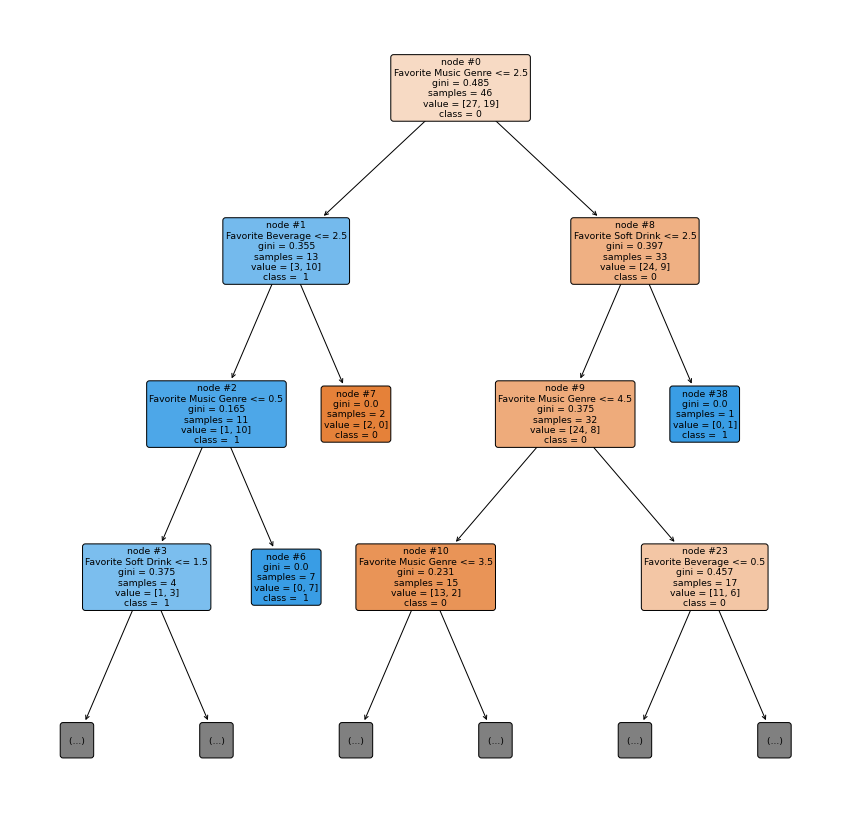

In [45]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink', 'Gender'],
            class_names = ['0',' 1']
            )

_=plt.show()


Accuracy for Decision Tree is 0.45

# Random Forest

In [46]:
from sklearn.metrics import mean_squared_error,r2_score 

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [48]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


In [49]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 4,  2],
       [10,  4]], dtype=int64)

In [50]:
df.feature_names = df[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink']]
df.target_names = df['Gender']

C:\Users\yogra\AppData\Local\Temp/ipykernel_35768/1522422859.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink']]
C:\Users\yogra\AppData\Local\Temp/ipykernel_35768/1522422859.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['Gender']


In [51]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.378086
2    0.370307
3    0.156571
0    0.095035
dtype: float64

In [52]:
list(zip(df.columns, feature_imp))

[('Favorite Color', 0.3780861987436644),
 ('Favorite Music Genre', 0.3703071477718375),
 ('Favorite Beverage', 0.15657149729970227),
 ('Favorite Soft Drink', 0.09503515618479583)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


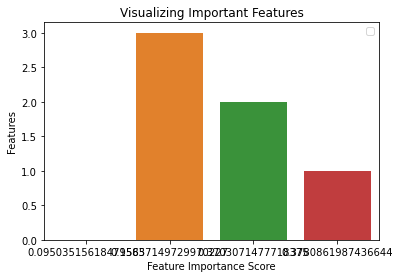

In [53]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [54]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.55


In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.38      0.83      0.53         6
           M       0.86      0.43      0.57        14

    accuracy                           0.55        20
   macro avg       0.62      0.63      0.55        20
weighted avg       0.72      0.55      0.56        20



Accuracy for Random forest classification is 0.55

Interpretations:

By comparing all the accuracies, 
    